### Netflix Movies and TV Shows - EDA

**Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Dataset**

In [2]:
df = pd.read_csv('netflix_titles.csv', encoding='iso-8859-1')

**Exploring Dataset**

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8809, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

**Data Cleaning**

In [6]:
undefined_cols = df.columns[12:].tolist()
df.drop(columns=undefined_cols, inplace=True)

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce').dt.year

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8792 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8792 non-null   object
 1   type          8792 non-null   object
 2   title         8792 non-null   object
 3   director      8792 non-null   object
 4   cast          8792 non-null   object
 5   country       8792 non-null   object
 6   date_added    8792 non-null   int32 
 7   release_year  8792 non-null   int64 
 8   rating        8792 non-null   object
 9   duration      8792 non-null   object
 10  listed_in     8792 non-null   object
 11  description   8792 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 858.6+ KB


**Data Visualization**

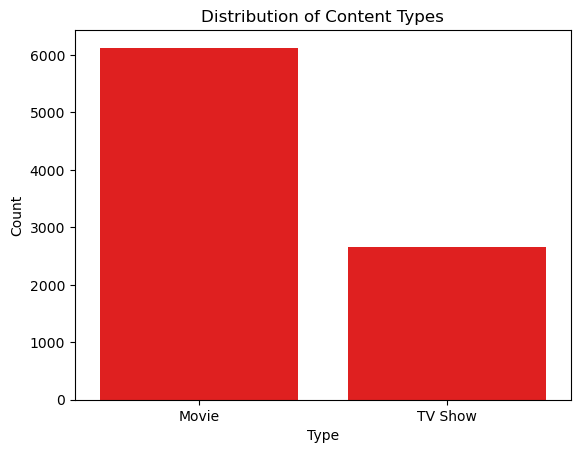

In [12]:
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, color='red')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

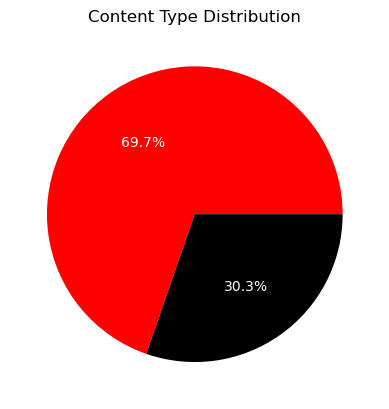

In [13]:
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', colors=["#ff0000", "#000000"], textprops={'color': 'white'})
plt.title('Content Type Distribution')
plt.show()

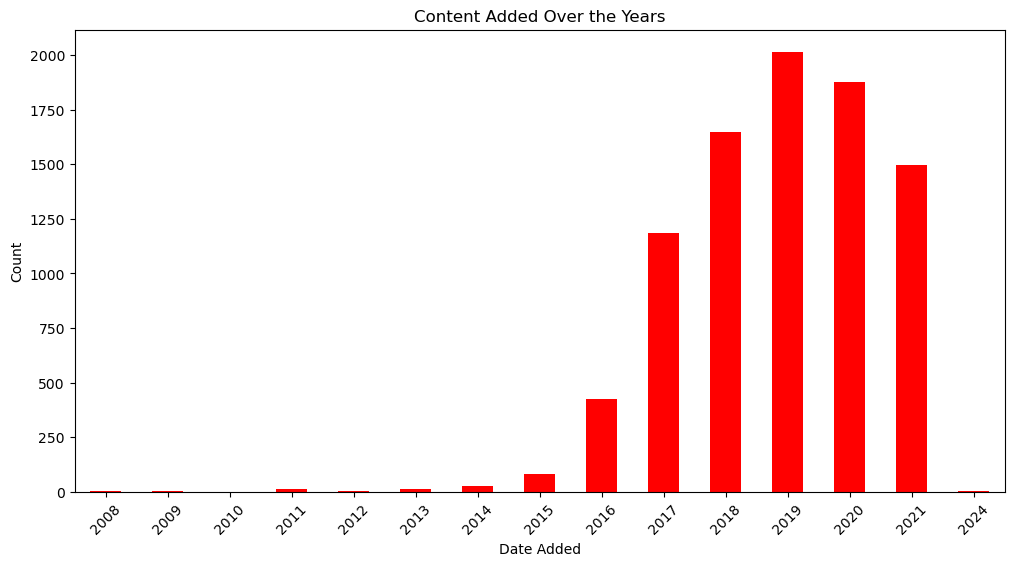

In [14]:
df['date_added'].value_counts().sort_index().plot(kind='bar', color='red', figsize=(12, 6))
plt.title('Content Added Over the Years')
plt.xlabel('Date Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

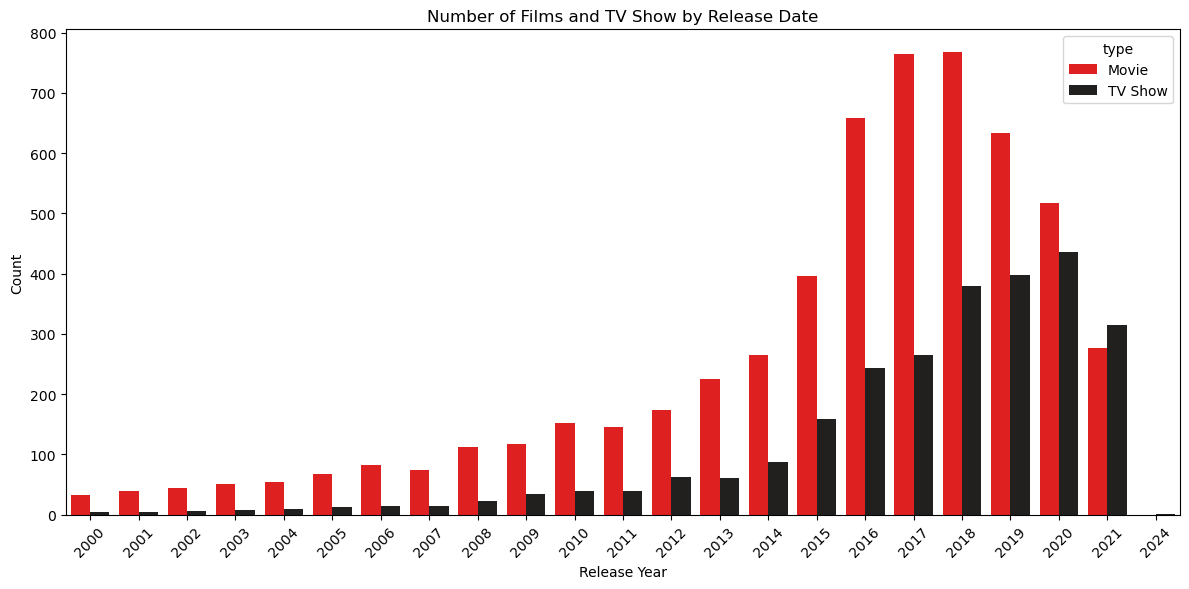

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x="release_year", hue="type", data=df[df.release_year >= 2000], palette=["#FF0000", "#221f1f"])
plt.title('Number of Films and TV Show by Release Date')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

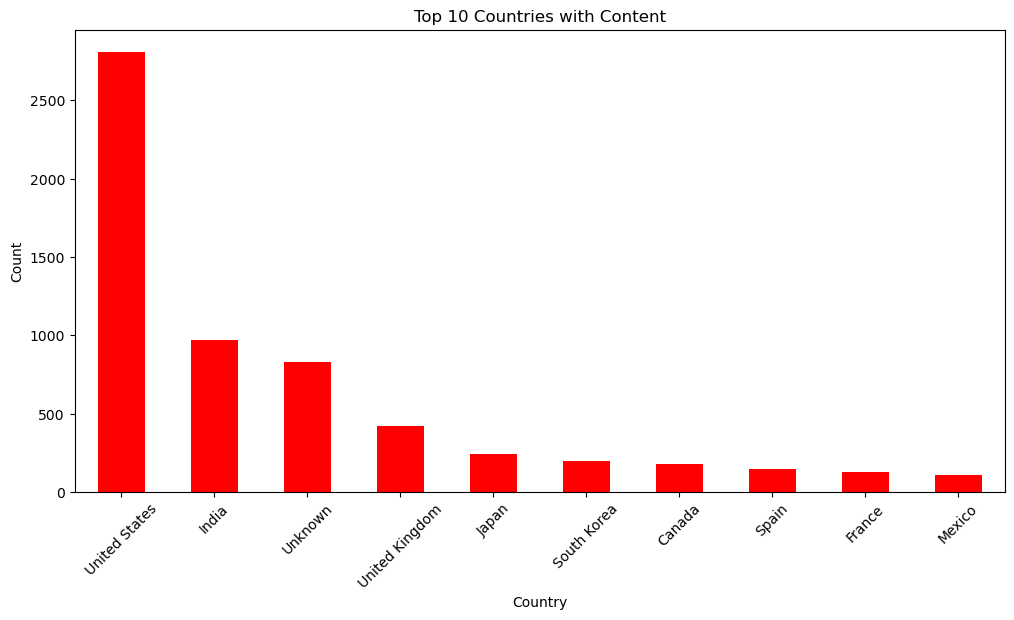

In [25]:
df['country'].value_counts().head(10).plot(kind='bar', color='red', figsize=(12, 6))
plt.title('Top 10 Countries with Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

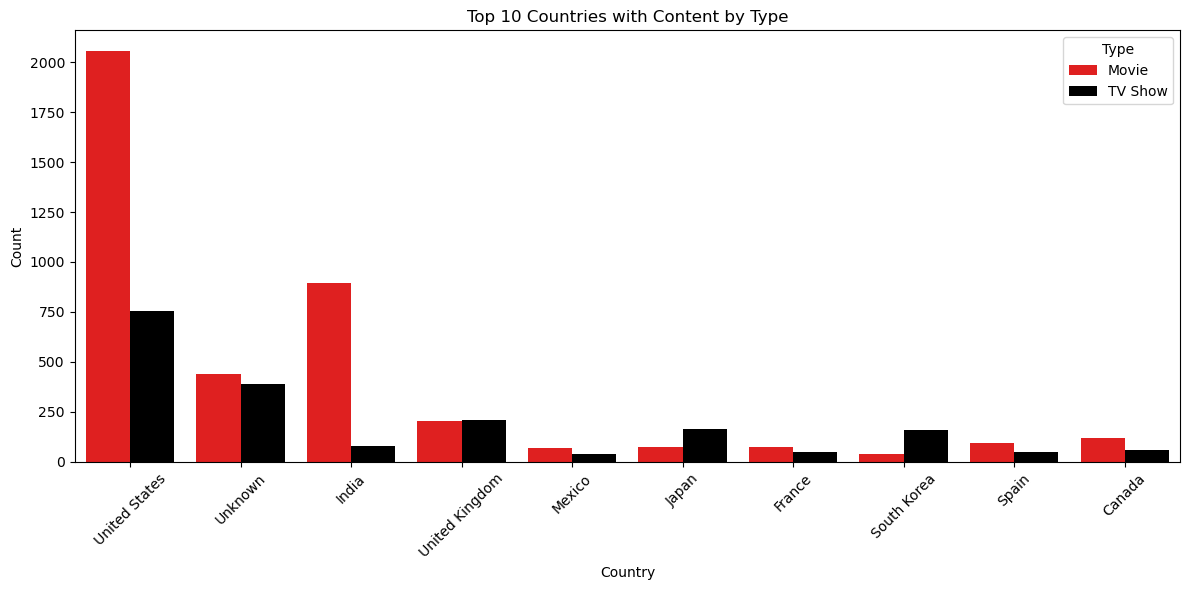

In [26]:
top_countries = df['country'].value_counts().head(10).index
df_top = df[df['country'].isin(top_countries)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='country', hue='type', palette=['red', 'black'])
plt.title('Top 10 Countries with Content by Type')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

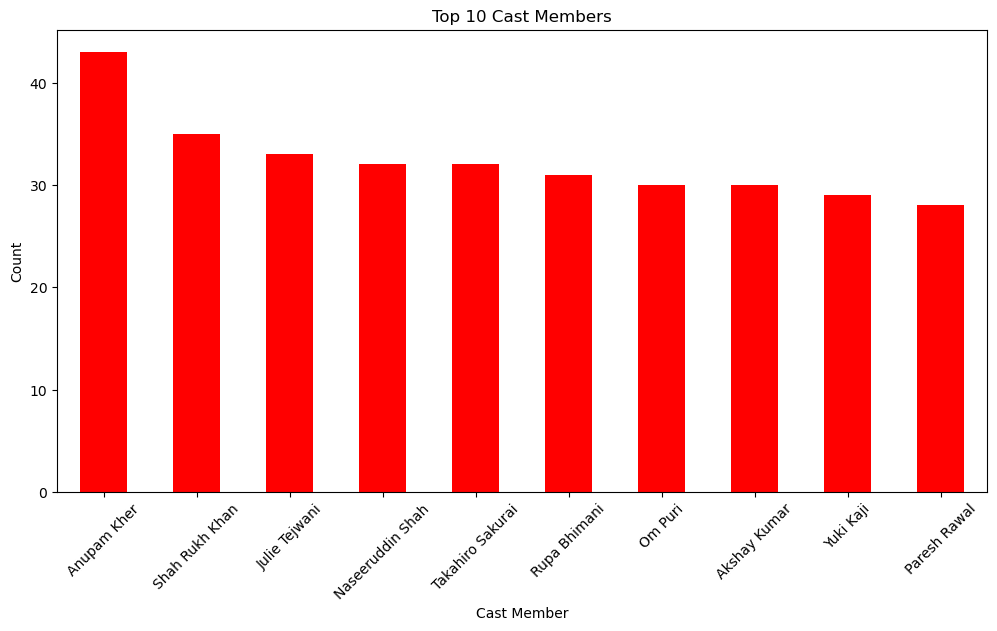

In [ ]:
top_cast = df['cast'].str.split(', ').explode()
top_cast = top_cast[top_cast != 'Unknown']
top_10 = top_cast.value_counts().head(10)
top_10.plot(kind='bar', color='red', figsize=(12, 6))
plt.title('Top 10 Cast Members')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


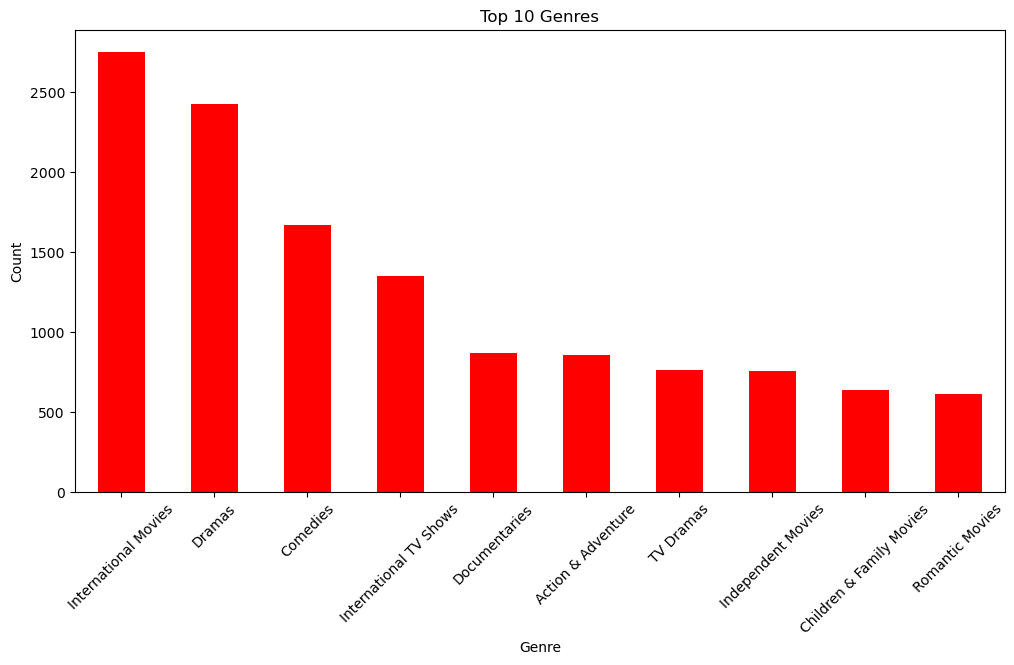

In [ ]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
top_genres.plot(kind='bar', color='red', figsize=(12, 6))
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

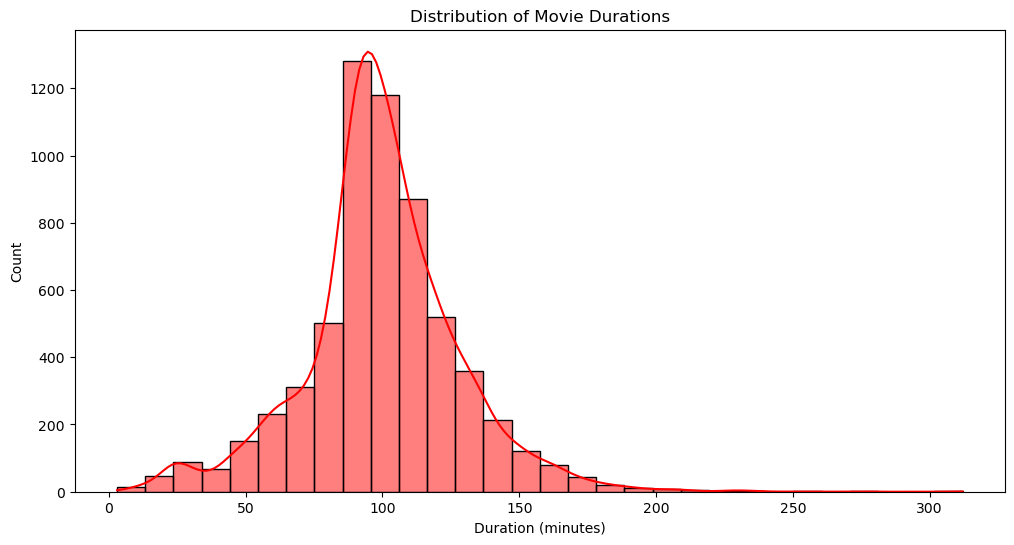

In [ ]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(12, 6))
sns.histplot(df_movies['duration'], bins=30, kde=True, color='red')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')    
plt.ylabel('Count')
plt.show()

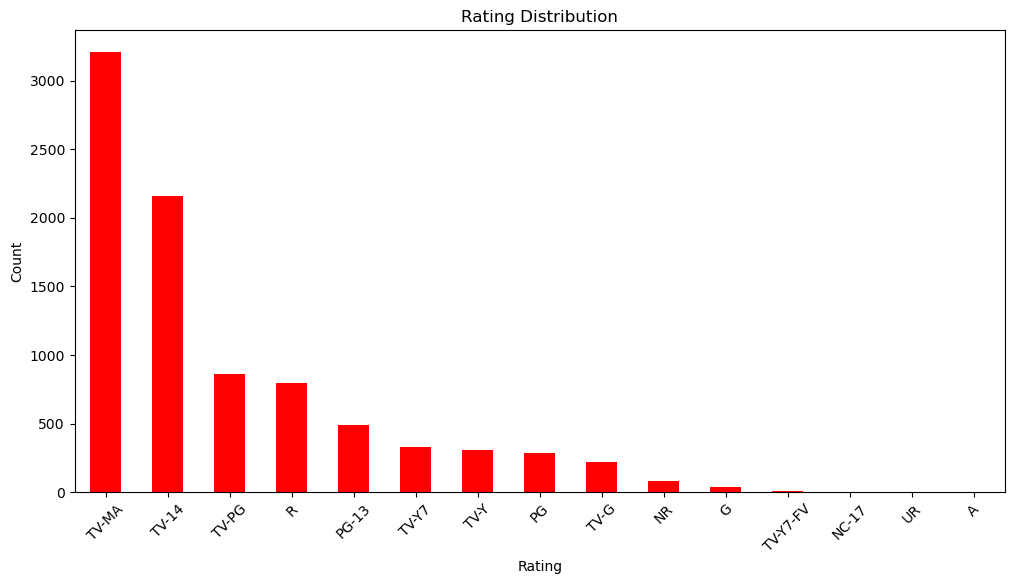

In [ ]:
rating_distribution = df['rating'].value_counts()
plt.figure(figsize=(12, 6))
rating_distribution.plot(kind='bar', color='red')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()